Exercise A. Traffic accidents in Python [60 marks]

In [20]:
##importing the libraries needed
import numpy as np

import pandas as pd


Exercise A (1.i)

In [21]:
##loading the data set //the FQPN/FQFN does not work because string is too long and jyputer notebook cannot read it
auxName = 'datasets-20221221/accidents2019.csv'
dataFrame = pd.read_csv(auxName)


C:\Users\AndreMota\AppData\Local\Temp\ipykernel_17172\4147668377.py:3: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pd.read_csv(auxName)


In [22]:
##showing the first 2 lines of the data frame
def displayTheFistNlinesOfDataFrame(nLines):
    return dataFrame.head(n=nLines)

displayTheFistNlinesOfDataFrame(2)   

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117


Exercise A (1.ii)

In [23]:
## to see the number of accients reported it is a simple matter of counting the number of rows (occurences) in the data frame

dataFrame.countdataFrame.count  

## as we can see from the output it is a [117536 rows x 32 columns] data frame meaning we have 117536 accidents

<bound method DataFrame.count of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
117531  2019984106919               312635.0                573392.0   
117532  2019984107019               337522.0                591682.0   
117533  2019984107219               318544.0                567087.0   
117534  2019984107419               336525.0                584226.0   
117535  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057         

In [24]:
##but to double  check we can see the count of accident indexes

dataFrame.count()

## as we can see the 117536 checks out as the accident index will never be a missing value and therefore it will be counted

Accident_Index                                 117536
Location_Easting_OSGR                          117508
Location_Northing_OSGR                         117508
Longitude                                      117508
Latitude                                       117508
Police_Force                                   117536
Accident_Severity                              117536
Number_of_Vehicles                             117536
Number_of_Casualties                           117536
Date                                           117536
Day_of_Week                                    117536
Time                                           117473
Local_Authority_(District)                     117536
Local_Authority_(Highway)                      117536
1st_Road_Class                                 117536
1st_Road_Number                                117536
Road_Type                                      117536
Speed_limit                                    117536
Junction_Detail             

Exercise A (1.iii)

In [25]:
## we can easily obtain an array with all the collum names but this is a bit messy to properly read so lets tidy up the output
dataFrame.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [26]:
## using an auxiliary for loop we can get a cleaner output of all the collum names in a tidy and spaced manner 

for col in dataFrame.columns:
    print(col)


Accident_Index
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location


Exercise A (1.iv)

In [27]:
def showNRowDateLongitudeLatitude(nline):

    ## remember that because in python arrays start in 0 (as its parent language C) the the 100th row has the index 99
    row100DataFrame = dataFrame.iloc[nline-1]

    ## now that we got the information just have to parse it to obtain only the date and cordinates 
    ## ('Date', 'Longitude', 'Latitude')

    auxDate = row100DataFrame['Date']
    auxLongitude = row100DataFrame['Longitude']
    auxLatitude = row100DataFrame['Latitude']

    ## just do a separation of the print of the string and variable for latitude and longitude since these aren't string variables 
    ## and it is much simpler and easier to read than converting their format to string
    print("The date of the " , end="")
    print(nline, end="")
    print("th accident is: " + auxDate)
    print("The latitude of the  " , end ="")
    print(nline, end="")
    print("th accident is: " ,end="")
    print(auxLatitude)
    print("The longitude cordinates of the " , end =" ")
    print(nline, end="")
    print("th accident is: " ,end="")
    print(auxLongitude)


showNRowDateLongitudeLatitude(100)
print("\n")
showNRowDateLongitudeLatitude(10)


The date of the 100th accident is: 03/01/2019
The latitude of the  100th accident is: 51.498486
The longitude cordinates of the  100th accident is: -0.264403


The date of the 10th accident is: 01/01/2019
The latitude of the  10th accident is: 51.399529
The longitude cordinates of the  10th accident is: -0.243769


Exercise A (1.v)

In [28]:
##first I will create a new collum with just the month since this data frame only contains accidents from 2019 and we don't need
## to diferenciate between years with the same month
## we can also easily observe that the date is organised in %dd/%mm/%YYYY format, so we are going to parse it like we would,
## using cut -f on linux

dataFrame['Month'] = np.nan

i = 0
for i in range(len(dataFrame)):
    
    auxString = dataFrame['Date'][i]
    
    ##leaving these year and day variables commented to better explain why month is the split [1]
    #auxDay = str(auxString).split("/")[0]
    #auxYear = str(auxString).split("/")[2]

    ## we store which month each accident is
    auxMonth = str(auxString).split("/")[1]

    ## we aggregate such month to the data frame to be able to easily group by the month
    dataFrame['Month'][i] = auxMonth
        
    i = i +1

    
## by grouping by we can now see all the accidents for each month by seeing the accident_index count
dataFrame.groupby(['Month']).count()

C:\Users\AndreMota\AppData\Local\Temp\ipykernel_17172\720818297.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Month'][i] = auxMonth


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Month,,,,,,,,,,,,,,,,,,,,,
01,9371,9370,9370,9370,9370,9371,9371,9371,9371,9371,...,9371,9371,9371,9371,9371,9371,9371,9371,9371,8856
02,8838,8836,8836,8836,8836,8838,8838,8838,8838,8838,...,8838,8838,8838,8838,8838,8838,8838,8838,8838,8389
03,9427,9425,9425,9425,9425,9427,9427,9427,9427,9427,...,9427,9427,9427,9427,9427,9427,9427,9427,9427,8956
04,8899,8897,8897,8897,8897,8899,8899,8899,8899,8899,...,8899,8899,8899,8899,8899,8899,8899,8899,8899,8390
05,9758,9756,9756,9756,9756,9758,9758,9758,9758,9758,...,9758,9758,9758,9758,9758,9758,9758,9758,9758,9236
06,9942,9939,9939,9939,9939,9942,9942,9942,9942,9942,...,9942,9942,9942,9942,9942,9942,9942,9942,9942,9496
07,10325,10322,10322,10322,10322,10325,10325,10325,10325,10325,...,10325,10325,10325,10325,10325,10325,10325,10325,10325,9820
08,9534,9532,9532,9532,9532,9534,9534,9534,9534,9534,...,9534,9534,9534,9534,9534,9534,9534,9534,9534,9054
09,10222,10220,10220,10220,10220,10222,10222,10222,10222,10222,...,10222,10222,10222,10222,10222,10222,10222,10222,10222,9767


In [29]:
def highestAccidentMonth(dataFrame):
    ## now we are going to compare each month and see which one has the higest number of accidents

    listMonths = dataFrame.groupby(['Month']).count()
    listMonths = listMonths.drop(listMonths.iloc[:, 1:32],axis = 1)

    
    listMonthsSorted = listMonths.sort_values(['Accident_Index'], ascending=[False])
    print("here is the list of months, descending by the number of accidents")
    print(listMonthsSorted)
    
    print("\nAs we can observe the ", end="")
    print((str(listMonthsSorted['Accident_Index']).split(" ")[0]).split("\n")[1],end="")
    print("th month as the higher number of accidents with ", end="") ## I am not bothering making it st,nd or rd
    print(listMonthsSorted['Accident_Index'][0],end="")
    print(" accidents")
    ## as we can observe the 11th month (November) as the higher number of accidents with 10937 accidents

    
highestAccidentMonth(dataFrame)

here is the list of months, descending by the number of accidents
       Accident_Index
Month                
11              10937
07              10325
10              10311
09              10222
12               9972
06               9942
05               9758
08               9534
03               9427
01               9371
04               8899
02               8838

As we can observe the 11th month as the higher number of accidents with 10937 accidents


Exercise A (2.i)

In [30]:
casualties = dataFrame['Number_of_Casualties'].sum()

print("the total number of casualties in 2019 is ", end="")
print(casualties)

the total number of casualties in 2019 is 153158


Exercise A (2.ii)

In [31]:
##comparing E01032739 (London) and E01033708 (Hackney)  
dataFrameLondon = dataFrame.loc[dataFrame['LSOA_of_Accident_Location'] == "E01032739"]
dataFrameHackney = dataFrame.loc[dataFrame['LSOA_of_Accident_Location'] == "E01033708"]

casualtiesLondon = dataFrameLondon['Number_of_Casualties'].sum()
casualtiesHackney = dataFrameHackney['Number_of_Casualties'].sum()

print("The number of casualities in the city of london is ", end="")
print(casualtiesLondon)
print("The number of casualities in the Hackney is ", end="")
print(casualtiesHackney)

casualtyDif = casualtiesLondon - casualtiesHackney
casualtyDif = abs(casualtyDif)

if casualtiesLondon > casualtiesHackney:
    print('The casualtie in the LSOA of the City of London 001F are bigger then the ones from the LSOA of Hackney 027G by ',end="")
    print(casualtyDif)
else:
    print('The casualtie in the LSOA of Hackney 027G are bigger then the ones from the LSOA of the City of London 001F by ',end="")
    print(casualtyDif)


The number of casualities in the city of london is 212
The number of casualities in the Hackney is 76
The casualtie in the LSOA of the City of London 001F are bigger then the ones from the LSOA of Hackney 027G by 136


Exercise A (2.iii)

In [32]:
dataFrameLSOA = dataFrame.groupby(['LSOA_of_Accident_Location']).count()

## this for loop does an almost identical job of using the funcion max but with this the critical difference is I am storing 
## the id of the LSOA with the biggest accident count which I will use to automate displaying the LSOA

i = 0
currentMaximumValue = -1
for i in range(len(dataFrameLSOA)):
    
    if dataFrameLSOA['Accident_Index'][i] > currentMaximumValue:
        currentMaximumValue = dataFrameLSOA['Accident_Index'][i]
        currentLSOAIndex = i


In [33]:
##now that I have the index when I look up the row using the iloc and the stored index there is a very critical difference 
## compared to using the max function, the iloc gives us both the name/code of the LSOA corresponding to the biggest accident 
## count

auxStringLSOA = dataFrameLSOA.iloc[currentLSOAIndex]

print(auxStringLSOA)


Accident_Index                                 194
Location_Easting_OSGR                          194
Location_Northing_OSGR                         194
Longitude                                      194
Latitude                                       194
Police_Force                                   194
Accident_Severity                              194
Number_of_Vehicles                             194
Number_of_Casualties                           194
Date                                           194
Day_of_Week                                    194
Time                                           194
Local_Authority_(District)                     194
Local_Authority_(Highway)                      194
1st_Road_Class                                 194
1st_Road_Number                                194
Road_Type                                      194
Speed_limit                                    194
Junction_Detail                                194
Junction_Control               

In [34]:
## here we get which is the number we will split the string to get the name
dataFrameLSOA.max()

auxString = str(dataFrameLSOA.max()).split("\n")[0]

## here we get the split indicator in a string format, in this case we will use the counted inccident number
auxSplit = auxString.split(' ')[-1]


In [35]:
## here we are parsing the name again as if using cut -f in linux
auxCut_f = str(auxStringLSOA).split(auxSplit)[-1]
print(auxCut_f)

biggestAccidentLSOA = str(auxCut_f).split(" ")[1]
print(biggestAccidentLSOA)

print('\n')

print('The LSOA with the highest total number of casualties in 2019 is the LSOA ' + biggestAccidentLSOA + ' with a total of ' + \
     auxSplit + ' accidents')

##pretty overengineered but it will bug me out if I leave it hardcoded, years of programming and scripting not wasted



Name: E01032739, dtype: int64
E01032739,


The LSOA with the highest total number of casualties in 2019 is the LSOA E01032739, with a total of 194 accidents


Exercise A (3.i)

In [36]:
##see all unique values
uniqueValues = dataFrame.Did_Police_Officer_Attend_Scene_of_Accident.unique()

uniqueValues.sort()
print(uniqueValues)
## as we can see here all the possibles values are 1, 2 and 3 for the police officers attending (or not) the scene


[1 2 3]


In [37]:
i = 0
countPolice1 = 0
countPolice2 = 0
countPolice3 = 0

for i in range(len(dataFrame)):
    
    if dataFrame['Did_Police_Officer_Attend_Scene_of_Accident'][i] == 1:
        countPolice1 = countPolice1 +1
    if dataFrame['Did_Police_Officer_Attend_Scene_of_Accident'][i] == 2:
        countPolice2 = countPolice2 +1
    if dataFrame['Did_Police_Officer_Attend_Scene_of_Accident'][i] == 3:
        countPolice3 = countPolice3 +1

        
probabilityPolice1 = countPolice1 / len(dataFrame)
probabilityPolice2 = countPolice2 / len(dataFrame)    
probabilityPolice3 = countPolice3 / len(dataFrame)    
        
print("The probability of the value being equal to 1 is ", end="")
print(probabilityPolice1)
print("The probability of the value being equal to 2 is ", end="")
print(probabilityPolice2)
print("The probability of the value being equal to 3 is ", end="")
print(probabilityPolice3)

The probability of the value being equal to 1 is 0.6917795398856521
The probability of the value being equal to 2 is 0.2236336101279608
The probability of the value being equal to 3 is 0.08458684998638714


Exercise A (3.ii)

In [38]:
## since when the variable Did_Police_Officer_Attend_Scene_of_Accident is equal 1 represents a police 
## officer being present then when the values is 2 or 3 it represent a police officer not being
##present, meaning we can derive the probability of a police officer not being present by summing up 
## the probability of value 2 and value 3 that together are the compliment of value 1

probabilityNoPoliceOfficer = probabilityPolice2 + probabilityPolice3

print("The probability that there was no police officer at the accident scene is ", end="")
print(probabilityNoPoliceOfficer)
print("Therefore the probability a police officer was at the accident scene is ", end="")
print(1-probabilityNoPoliceOfficer)

The probability that there was no police officer at the accident scene is 0.30822046011434795
Therefore the probability a police officer was at the accident scene is 0.6917795398856521


Exercise A (3.iii)

In [39]:
i = 0
##monday is day of week = 2
## so weeks start on sunday as they should
countMondays = 0
countTuesdays = 0
countWednesdays = 0
countThursdays = 0
countFridays = 0
countSaturdays = 0
countSundays = 0

for i in range(len(dataFrame)):
    
    ## we will just to some light counting of the days of the week where the police was present
    
    ## for performance reasons I will just nest the weekday check inside the initial police check
    if dataFrame['Did_Police_Officer_Attend_Scene_of_Accident'][i] == 1:
        
        if dataFrame['Day_of_Week'][i] == 2:
            countMondays = countMondays +1
        if dataFrame['Day_of_Week'][i] == 3:
            countTuesdays = countTuesdays +1
        if dataFrame['Day_of_Week'][i] == 4:
            countWednesdays = countWednesdays +1
        if dataFrame['Day_of_Week'][i] == 5:
            countThursdays = countThursdays +1
        if dataFrame['Day_of_Week'][i] == 6:
            countFridays = countFridays +1
        if dataFrame['Day_of_Week'][i] == 7:
            countSaturdays = countSaturdays +1
        if dataFrame['Day_of_Week'][i] == 1:
            countSundays = countSundays +1
        
        
    i = i +1


print(countMondays)
print(countTuesdays)
print(countWednesdays)
print(countThursdays)
print(countFridays)
print(countSaturdays)
print(countSundays)



#dataFrame.groupby(['Day_of_Week']).count()

11417
12038
12145
12185
13042
11067
9415


In [40]:
dataFrameDayOfWeek = dataFrame.groupby(['Day_of_Week']).count()

dataFrameDayOfWeek[['Accident_Index']]


,Accident_Index
Day_of_Week,
1,12935
2,16643
3,17598
4,17775
5,17973
6,19056
7,15556


In [41]:
## apparently I can just grab the values like this with saves time in parsing, I will be using these values to see how many
## of the total accidents did indeed had a policeman on the crash site

totalAccidentsMonday = dataFrameDayOfWeek['Accident_Index'][2]
totalAccidentsTuesday = dataFrameDayOfWeek['Accident_Index'][3]
totalAccidentsWednesday = dataFrameDayOfWeek['Accident_Index'][4]
totalAccidentsThursday = dataFrameDayOfWeek['Accident_Index'][5]
totalAccidentsFriday = dataFrameDayOfWeek['Accident_Index'][6]
totalAccidentsSaturday = dataFrameDayOfWeek['Accident_Index'][7]
totalAccidentsSunday = dataFrameDayOfWeek['Accident_Index'][1]

ratioPoliceMonday = countMondays / totalAccidentsMonday
ratioPoliceTuesdays = countTuesdays / totalAccidentsTuesday
ratioPoliceWednesdays = countWednesdays / totalAccidentsWednesday
ratioPoliceThursdays = countThursdays / totalAccidentsThursday
ratioPoliceFridays = countFridays / totalAccidentsFriday
ratioPoliceSaturdays = countSaturdays / totalAccidentsSaturday
ratioPoliceSundays = countSundays / totalAccidentsSunday


print("The police was involved in ", end="")
print(ratioPoliceMonday, end=" ")
print("of the accidents on mondays")
print("The police was involved in ", end="")
print(ratioPoliceTuesdays, end=" ")
print("of the accidents on tuesdays")
print("The police was involved in ", end="")
print(ratioPoliceWednesdays, end=" ")
print("of the accidents on wednesdays")
print("The police was involved in ", end="")
print(ratioPoliceThursdays, end=" ")
print("of the accidents on thrusdays")
print("The police was involved in ", end="")
print(ratioPoliceFridays, end=" ")
print("of the accidents on fridays")
print("The police was involved in ", end="")
print(ratioPoliceSaturdays, end=" ")
print("of the accidents on saturdays")
print("The police was involved in ", end="")
print(ratioPoliceSundays, end=" ")
print("of the accidents on sundays")

The police was involved in 0.6859941116385267 of the accidents on mondays
The police was involved in 0.6840550062507104 of the accidents on tuesdays
The police was involved in 0.6832630098452883 of the accidents on wednesdays
The police was involved in 0.6779613865242308 of the accidents on thrusdays
The police was involved in 0.6844038623005877 of the accidents on fridays
The police was involved in 0.7114296734379018 of the accidents on saturdays
The police was involved in 0.7278701198299188 of the accidents on sundays


In [42]:
## to calculate the likelyhood of the accident being on the weekend or on a weekday we will just see the median of weekdays 
## and weekends

ratioWeekdays = (ratioPoliceMonday + ratioPoliceTuesdays + ratioPoliceWednesdays + ratioPoliceThursdays + ratioPoliceFridays) / 5

ratioWeekends = (ratioPoliceSaturdays + ratioPoliceSundays) /2

if ratioWeekends > ratioWeekdays:
    print('It is ', end="")
    print(ratioWeekends-ratioWeekdays, end=" ")
    print("more like for the police agent to be involved on an accident on the weekend then on a week day")
    
if ratioWeekends < ratioWeekdays:
    print('It is ', end="")
    print(ratioWeekdays - ratioWeekends, end=" ")
    print("more like for the police agent to be involved on an accident on a week day then on the weekend ")

print("With a average probability of ", end="")
print(ratioWeekdays, end=" ")
print("for the weekdays and an average probability of ", end="")
print(ratioWeekends, end=" ")
print("for the weekend of a policeman being present during an accident report")



It is 0.036514421322041524 more like for the police agent to be involved on an accident on the weekend then on a week day
With a average probability of 0.6831354753118687 for the weekdays and an average probability of 0.7196498966339102 for the weekend of a policeman being present during an accident report


Exercise A (4.i)

In [43]:
##visualization

from plotnine import *
import matplotlib.pyplot as plt

#dataFrameCordinates 

dataFrameCordinates = dataFrame.drop(dataFrame.iloc[:, 5:33],axis = 1)

dataFrameCordinates = dataFrameCordinates.drop(dataFrame.iloc[:, 0:3],axis = 1)

dataFrameCordinates

,Longitude,Latitude
0,-0.153842,51.508057
1,-0.127949,51.436208
2,-0.124193,51.526795
3,-0.191044,51.546387
4,-0.200064,51.541121
...,...,...
117531,-3.368899,55.047323
117532,-2.983499,55.215407
117533,-3.274645,54.991685
117534,-2.997491,55.148292


Text(0, 0.5, 'Latitude')

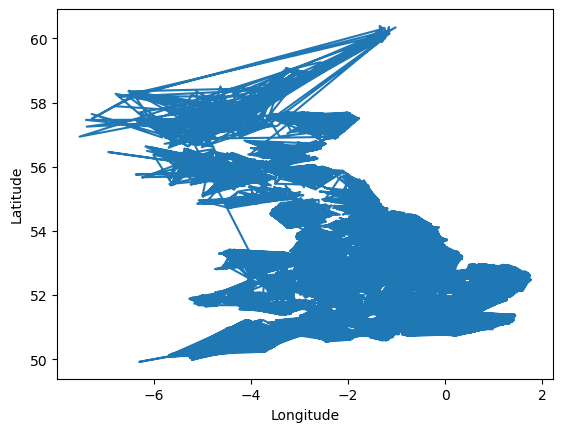

In [44]:
## just some initial exploratory analysis without using the grammer of graphics
plt.plot(dataFrameCordinates["Longitude"], dataFrameCordinates["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

C:\Users\AndreMota\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 28 rows containing missing values.


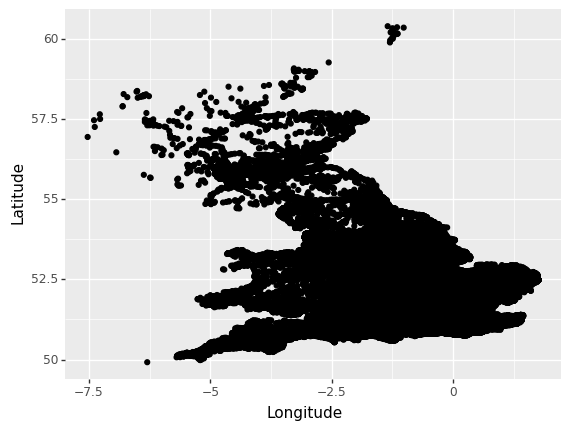

<ggplot: (100274055671)>

In [45]:
## now using ggplot
(ggplot(dataFrameCordinates) +
aes(x='Longitude', y='Latitude') +
geom_point() )



As we can easiy observe England and wales are very well detailed with this amount of accidents density but as we start going north, into northen England and Scotland the density is clear to have decreased significantly to the point where some regions barely have accidents reported

Exercise A (4.ii)

C:\Users\AndreMota\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 28 rows containing missing values.


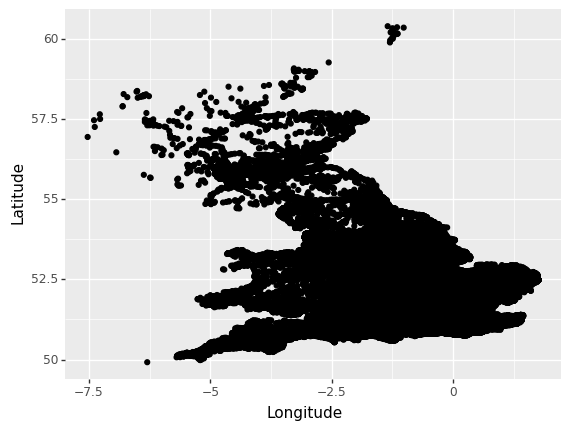

<ggplot: (100274984783)>

In [46]:
## now using ggplot
(ggplot(dataFrameCordinates) +
aes(x='Longitude', y='Latitude') +
coord_cartesian(ylim = None,
               xlim = None) +
geom_point() 
)

C:\Users\AndreMota\AppData\Local\Temp\ipykernel_17172\1620363418.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\AndreMota\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 111712 rows containing missing values.
C:\Users\AndreMota\anaconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


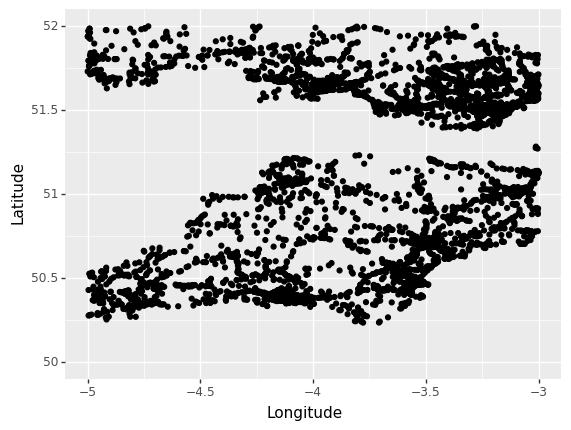

<ggplot: (100280061531)>

In [49]:
## now using ggplot we will zoom in the the devon area

## Coordinates of Exeter in decimal degrees
##Latitude: 50.7236000°
##Longitude: -3.5275100° 

## Creating the exeter point we will colour on the map as orange
Exeter = {'Longitude':-3.5275100, 'Latitude':50.7236000}

dataFrameCordinatesExeter = dataFrameCordinates.append(Exeter,ignore_index=True) 


(ggplot(dataFrameCordinatesExeter) +
aes(x='Longitude', y='Latitude') +
ylim(50, 52) +
xlim(-5, -3) +
scale_color_manual(values = ['blue'],
                   limits = ['(-3.5275100,50.7236000]'])+ ##TODO FIX EXETER NOT BEING COLOURED
geom_point() 
)

In [48]:

dataFrameCordinatesExeter


,Longitude,Latitude
0,-0.153842,51.508057
1,-0.127949,51.436208
2,-0.124193,51.526795
3,-0.191044,51.546387
4,-0.200064,51.541121
...,...,...
117532,-2.983499,55.215407
117533,-3.274645,54.991685
117534,-2.997491,55.148292
117535,-3.715064,55.357237


Exercise A (5.i)

In [95]:
## since python does have the gally library from R I found a replacement 

import seaborn as sns

## example of the syntax #ficaADica #https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h
#penguins = sns.load_dataset("penguins") ##this one is only for loading example data frames
#g = sns.PairGrid(penguins, hue="species")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [134]:
dataFrame.isnull().sum()

Accident_Index                                  0
Location_Easting_OSGR                           0
Location_Northing_OSGR                          0
Longitude                                       0
Latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                           63
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
Junction_Detail                                 0
Junction_Control                                0


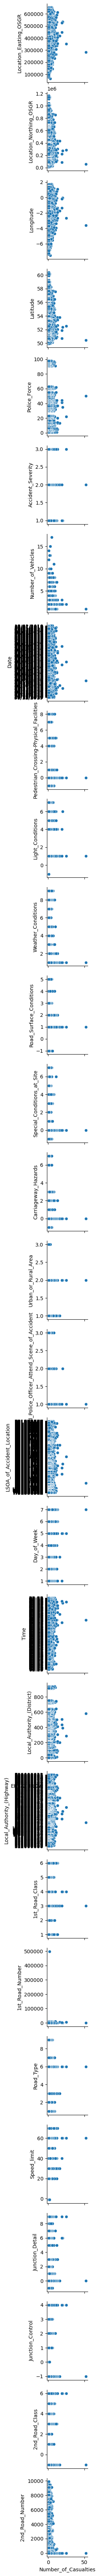

In [136]:
##yes I am really going to write all the variables like some sort of psyco

## the pp stands for pair plot and not something way funnier
##I know this is convuluted but since there is an hard limit of 2 graphs I can't break this into multiple simpler to read graphs

pp = sns.pairplot(data=dataFrame,
                  x_vars=['Number_of_Casualties'],
                  y_vars=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude','Latitude', 'Police_Force', \
                          'Accident_Severity', 'Number_of_Vehicles', 'Date', 'Pedestrian_Crossing-Physical_Facilities', \
                         'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', \
                         'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', \
                          'LSOA_of_Accident_Location', 'Day_of_Week','Time', 'Local_Authority_(District)', \
                          'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number','Road_Type','Speed_limit', \
                         'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number'])

    

## TODO you forgot the remaining values between date and pedestrian

 anyway from what I hope I can display in pdf
 We can observe that higher values of location Easting have slighty higher casualties but location Northing has the opposite 
effect, where the lower values correspond to an higer number of casualties
Latitude and Longitude are also predictors of number of casualties since higher longitude values lead to more casualties per accident and the lower the latitude the higher the number of casualties as well.
These flutuations can be explained by the difference in population 
Police force does not seem to have any significant influence that we can observe from the graph.
Accident severity level 1 and 3 seem to have the same amount of casualties but accident severely level 2 seem to have significantly more accident casualties than the other 2 values.
The number of vechiles has a negative relationship to the number of casualties expect the jump from only 1 vechicle accidents to two vechicles.
The  number of pedestrians does not seem to have a strong correlation with number of casualties as the numbers are of casualties are not too different in our limited range with the expection of 0 pedestrians
Light condition seems to have a negative correlation with the number of casualties as the smaller the light conditions are the bigger the ammount of casualties.
Weather conditions from 1 to 7 seem to be exponentially decreasing and then it has a slight increase.
The surface condition of the road seems to have exponential decrease as the conditions level increases.
There seems to be no variance in casualties from special conditions on site has with all non zero conditions the casualties seem to remain the same with a notorious increase in casualties for zero special conditions.
Carriageway hazards have a slighly higher number of casualty while no ccasualties has a significantly higher number of casualties.
Urban and rural areas don't seem to have any significant correlation to number of casualties with differences only occuring in outliers.
Police officer attendance occurs when the value is equal to 1, meaning that police office occurance presence is registered when there is an higher number of casualties
The time does not seem to have apparent correlation with the number of casualties.
Local Authority in district does not seem to have significant correlation with the number of casualties.
Local Authority in highways does not seem to have significant correlation with the number of casualties.
The 1st road class seem to have a similar increase of casualties for the level 1, 3 and 6 compared to the levels 2, 4 and 5 that have similarly lower casualties.
The 1st road number does not appear to have a strong correlation with casualties with only a few outliers have more casualties then the remaining values.
Road type number 3 and 6 have an obvious higher degree of casualties compared to all the other values.
Speed limit has a non linear relationship with casualties with what seems to be a sine wave correlation.
Junction control relatio  that once again resembles a sine wave with junction control 0 and 3 having significantly higher casualties.

Now that we have finished our exploratory analysis of the data we will run a simple linear model at first to check how much each variable can explain the number of casualties.


In [103]:
##NA treatment, as we seen from the initial count of all values there are multiple collums with at least one missing value NA
## we will be filling them to be able to aplly the inital regression model and any other consecutive regression model

## in this dataframe its Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Time and LSOA_of_Accident_Location

dataFrame.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [126]:
## to impute these missing values I will be using KNN Imputation as known as K-nearest-neighbour algorithm
## to attempt to have reasonable values that would match the missing locations
from sklearn.impute import KNNImputer
#import math
# define imputer
#imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
#imputer.fit(X)

dataFrame.Location_Easting_OSGR = dataFrame.Location_Easting_OSGR.fillna(method = 'ffill')
dataFrame.Location_Northing_OSGR = dataFrame.Location_Northing_OSGR.fillna(method = 'ffill')
dataFrame.Longitude = dataFrame.Longitude.fillna(method = 'ffill')
dataFrame.Latitude = dataFrame.Latitude.fillna(method = 'ffill')
dataFrame.LSOA_of_Accident_Location = dataFrame.LSOA_of_Accident_Location.fillna(method = 'ffill')

In [130]:
## https://scikit-learn.org/stable/modules/linear_model.html
from sklearn import linear_model



reg = linear_model.LinearRegression()
## first the independent variables aka all the collumns (I won't be putting the date but I will put the month one instead)

#reg.fit(dataFrame[['Location_Easting_OSGR','Location_Northing_OSGR']],dataFrame.Number_of_Casualties) 
## problems with Local_Authority_(Highway) 'LSOA_of_Accident_Location',
reg.fit(dataFrame[['Police_Force','Accident_Severity','Number_of_Vehicles','Day_of_Week','Local_Authority_(District)', \
                   '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit','Junction_Detail', 'Junction_Detail', \
                  'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', \
                  'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', \
                  'Road_Surface_Conditions','Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', \
                  'Did_Police_Officer_Attend_Scene_of_Accident',  \
                  'Location_Easting_OSGR' , 'Location_Northing_OSGR', 'Longitude', 'Latitude']],dataFrame.Number_of_Casualties)

LinearRegression()

LinearRegression()

In [132]:
reg.coef_

array([-3.08831373e-03, -1.13951152e-01,  2.22651005e-01,  2.55513947e-03,
        2.55758154e-04, -9.47634152e-03,  2.12933029e-06,  1.04844610e-02,
        5.12876654e-03,  3.83519277e-03,  3.83519277e-03, -1.01448613e-02,
        2.66810981e-03,  1.79082744e-06, -8.08551249e-03,  3.35794306e-03,
        1.35979003e-02, -2.91103756e-03,  2.38787893e-03,  2.16593182e-03,
       -5.69463579e-05,  6.73264807e-02, -7.35314621e-02, -1.33026282e-06,
        8.81677732e-06,  8.16790807e-02, -9.68771164e-01])

In [133]:
reg.intercept_

49.97725278850325